# Model Building on Admission Prediction Dataset

# Problem:

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

# Feature Explanation:

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1) GRE Scores ( out of 340 )                                                                                                 
2) TOEFL Scores ( out of 120 )                                                                                                
3) University Rating ( out of 5 )                                                                                              
4) Statement of Purpose and Letter of Recommendation Strength ( out of 5 )                                                     
5) Undergraduate GPA ( out of 10 )                                                                                              
6) Research Experience ( either 0 or 1 )                                                                                       
7) Chance of Admit ( ranging from 0 to 1 )

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# reading data
dataset = pd.read_csv('Admission_Prediction.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.shape

(500, 9)

OBSERVATIONS: It seems to be very small dataset with 500 rows and 9 columns

In [4]:
# copying data
df = dataset.copy()

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Splitting Data

In [7]:
X = df.drop(columns='Chance of Admit ')

In [8]:
y = df['Chance of Admit ']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (400, 8)
X_test : (100, 8)
y_train : (400,)
y_test : (100,)


# Analyze Data

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 238 to 37
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 28.1 KB


In [12]:
#checking missing values
print('X_train:',X_train.isnull().sum())
print('X_test:',X_test.isnull().sum())
print('y_train:',y_train.isnull().sum())
print('y_test:',y_test.isnull().sum())

X_train: Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64
X_test: Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64
y_train: 0
y_test: 0


In [13]:
# checking duplicates
print('X_train:',X_train[X_train.duplicated()])
print('X_test:',X_test[X_test.duplicated()])

X_train: Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research]
Index: []
X_test: Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research]
Index: []


In [14]:
# droping features
X_train.drop(columns='Serial No.',inplace=True)
X_test.drop(columns='Serial No.',inplace=True)

In [15]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (400, 7)
X_test : (100, 7)


<AxesSubplot:>

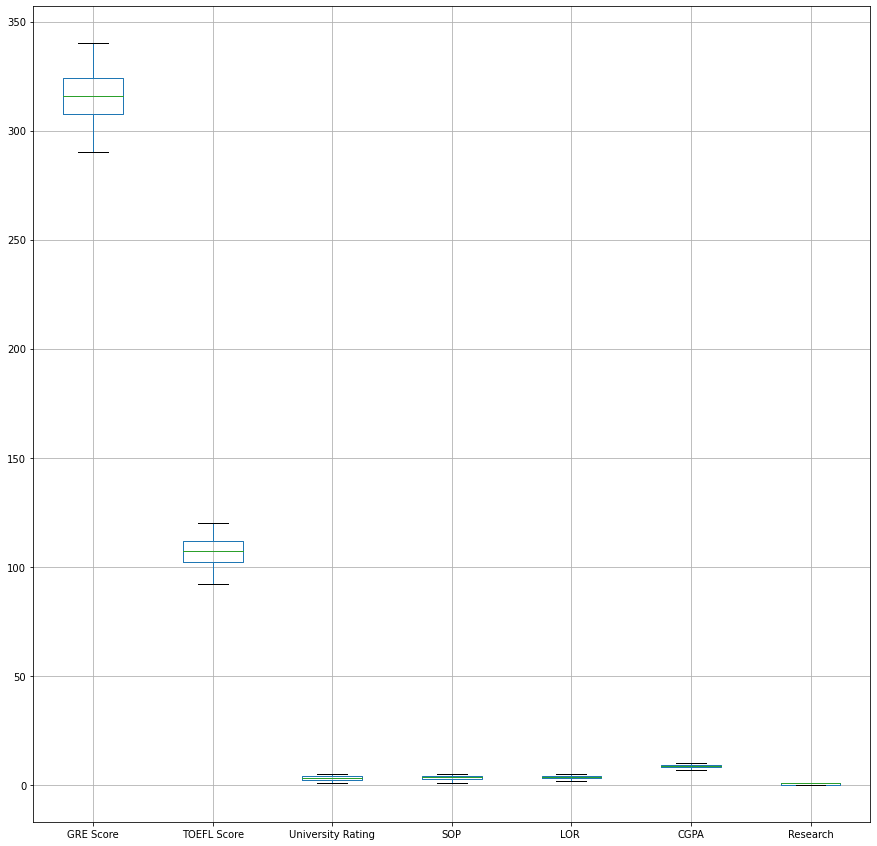

In [16]:
# checking Outliers
X_train.boxplot(figsize=(15,15))

<AxesSubplot:>

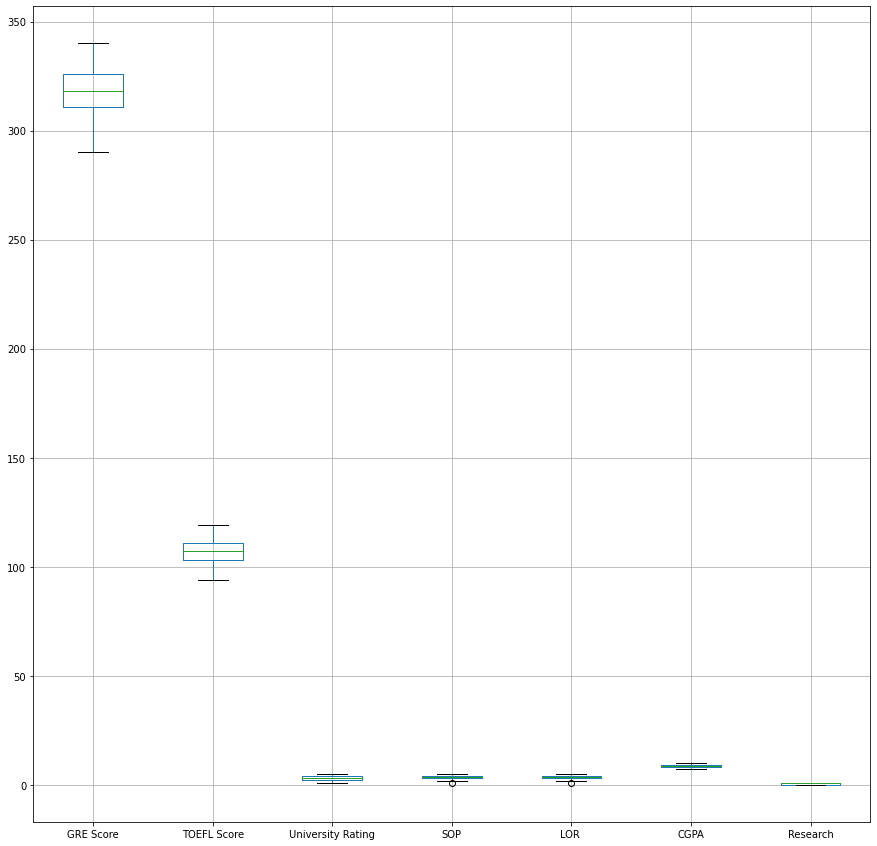

In [17]:
X_test.boxplot(figsize=(15,15))

**Insights:**

1)There is no missing values in any of the features                                                                              
2)There is no duplicates                                                                                                        
3)It Seems that there is no much outliers                                                                                      
4) All are Numerical Features

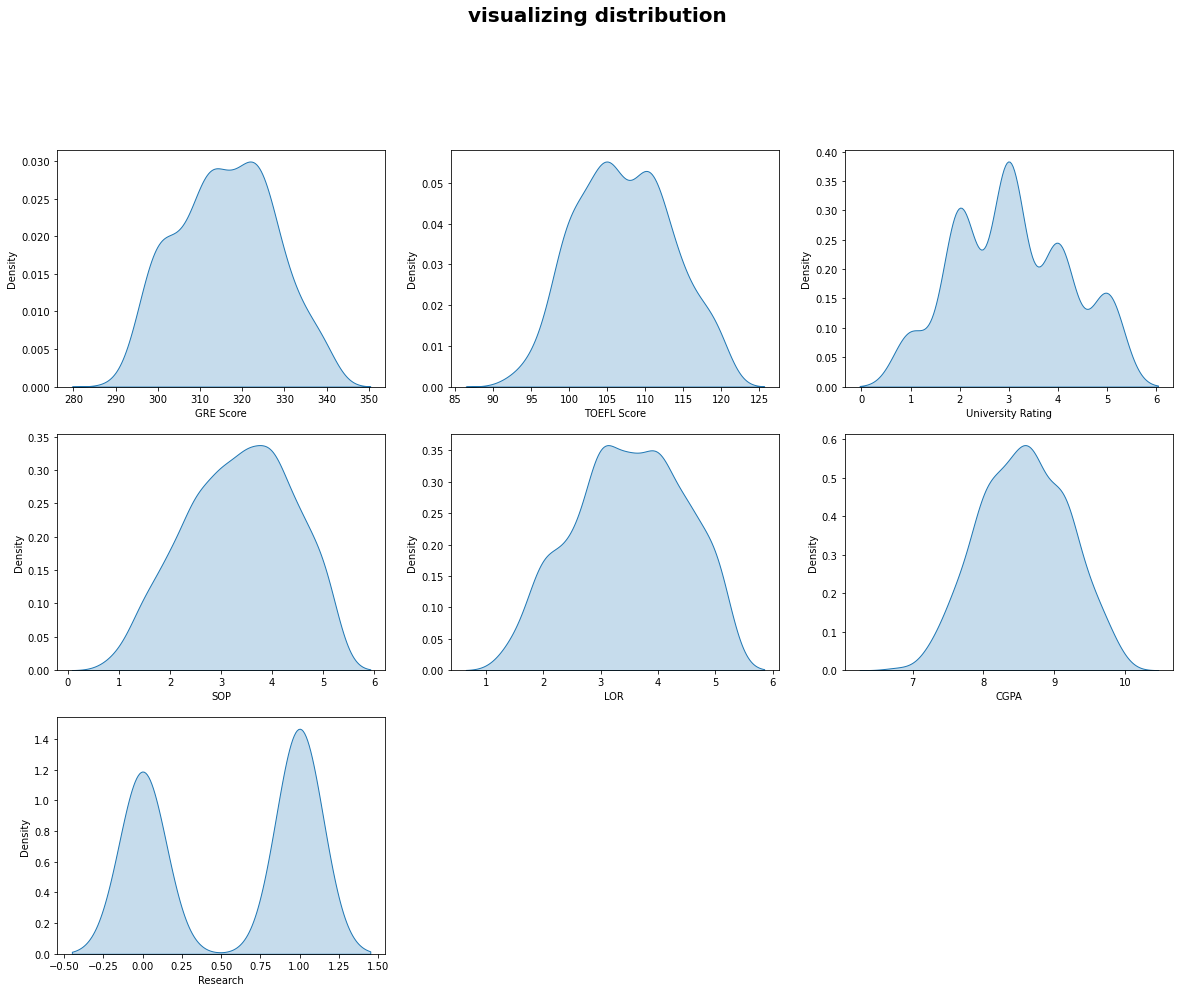

In [18]:
# visualizing features

plt.figure(figsize=(20,20))
plt.suptitle('visualizing distribution',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_train.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], shade=True)

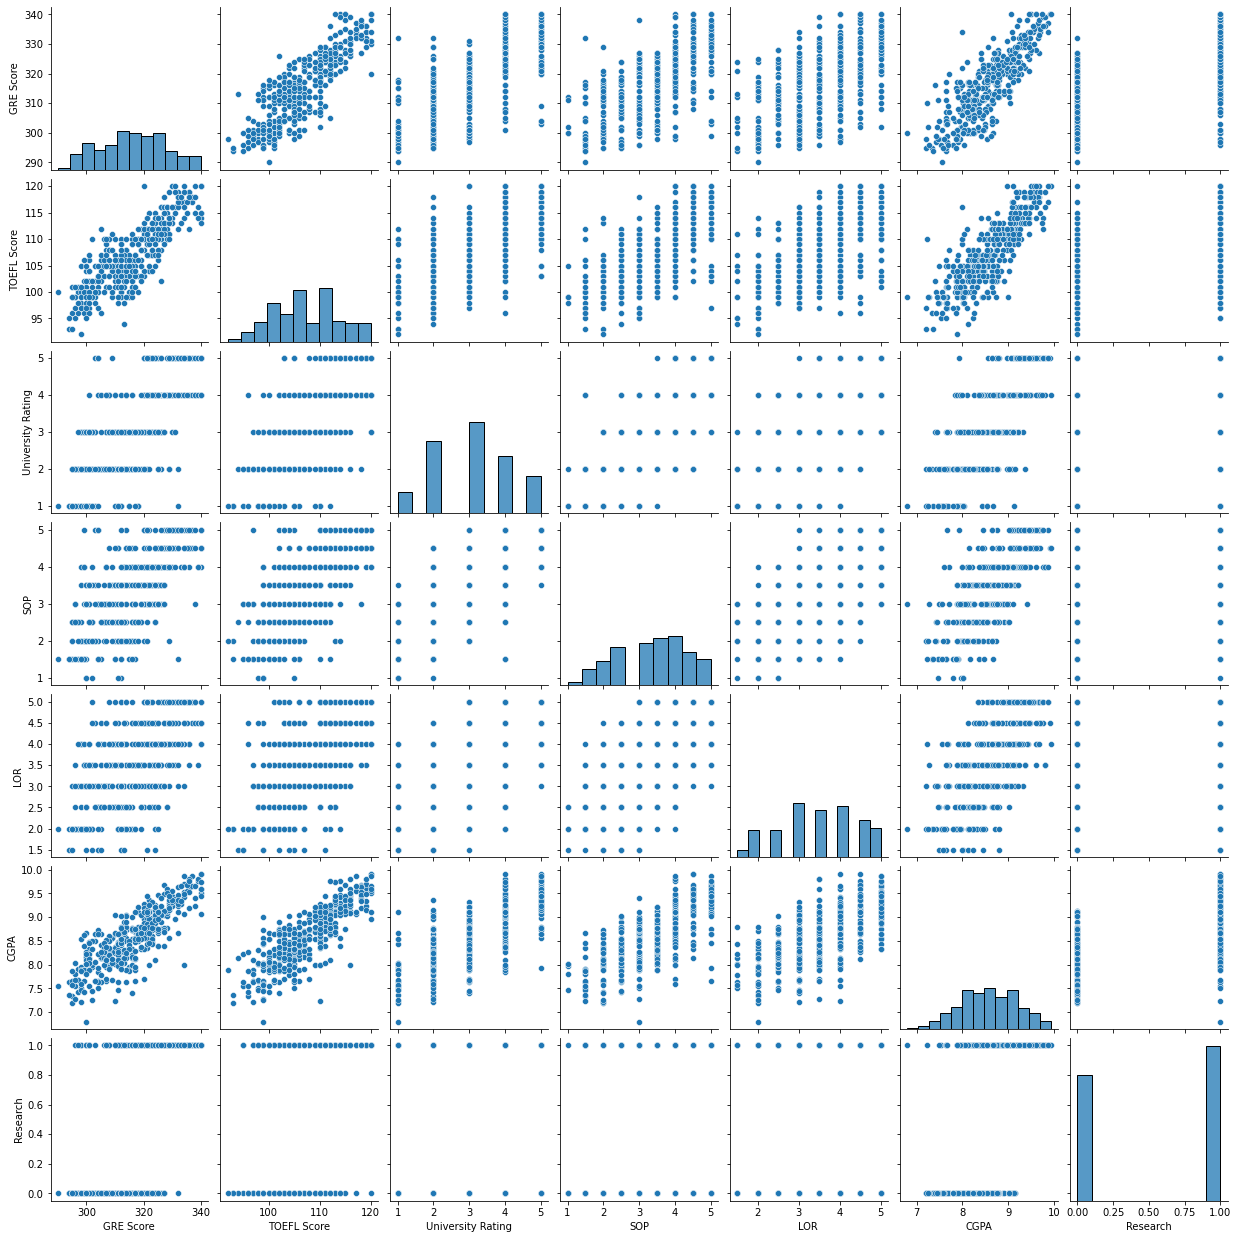

In [19]:
# multivatiate analysis
sns.pairplot(X_train)

<AxesSubplot:>

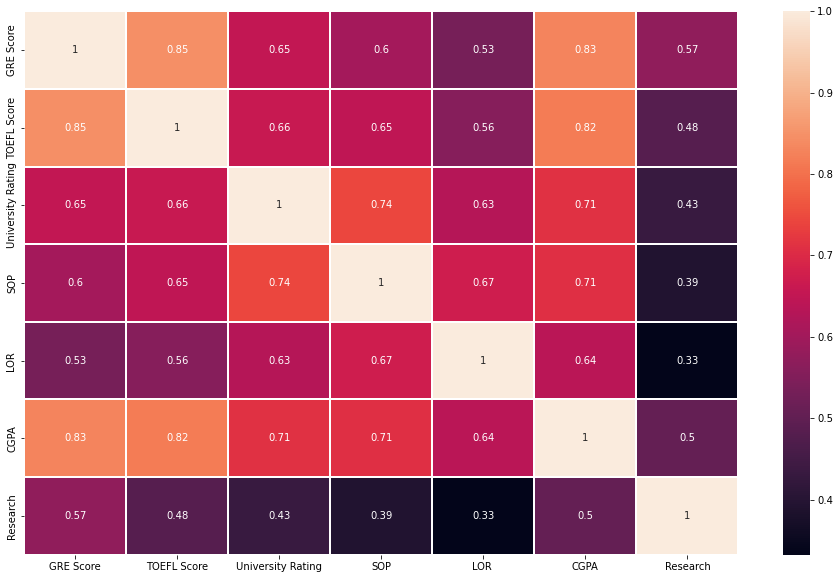

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(),annot=True,linewidths=0.2)

In [21]:
def correlation(X_train,threshold):
    col_cor = set()
    cor_matrix = X_train.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if (cor_matrix.iloc[i,j])>threshold :
                colname = cor_matrix.columns[i]
                col_cor.add(colname)
                
    return col_cor

In [22]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

3

In [23]:
corr_features

{'CGPA', 'SOP', 'TOEFL Score'}

**Insights:**

As these 3 features are highly coorelated, we can drop it

In [24]:
X_train.drop(columns=['CGPA','SOP',"TOEFL Score"],inplace=True)
X_test.drop(columns=['CGPA','SOP',"TOEFL Score"],inplace=True)

In [25]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

X_train : (400, 4)
X_test : (100, 4)


# Feature Scaling

In [26]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [27]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (400, 4)
X_test : (100, 4)
y_train : (400,)
y_test : (100,)


# Model Building

**Linear Regression**

In [28]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)
print('R2_score: ',r2_score(y_test,linear_pred))
print('MSE score: ',mean_squared_error(y_test,linear_pred))
print('score of train data: ',linear.score(X_train,y_train))
print('score of test data: ',linear.score(X_test,y_test))

R2_score:  0.7449443108438143
MSE score:  0.004925380413295102
score of train data:  0.7451095025699888
score of test data:  0.7449443108438143


**Ridge Regression**

In [29]:
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print('R2_score: ',r2_score(y_test,ridge_pred))
print('MSE score: ',mean_squared_error(y_test,ridge_pred))
print('score of train data: ',ridge.score(X_train,y_train))
print('score of test data: ',ridge.score(X_test,y_test))

R2_score:  0.7449711892180577
MSE score:  0.004924861365010087
score of train data:  0.7451069407310311
score of test data:  0.7449711892180577


**Lasso Regression**

In [30]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
print('R2_score: ',r2_score(y_test,lasso_pred))
print('MSE score: ',mean_squared_error(y_test,lasso_pred))
print('score of train data: ',lasso.score(X_train,y_train))
print('score of test data: ',lasso.score(X_test,y_test))

R2_score:  -0.000859904976438175
MSE score:  0.019327605625
score of train data:  0.0
score of test data:  -0.000859904976438175


**Elastic Net Regression**

In [31]:
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = elastic.predict(X_test)
print('R2_score: ',r2_score(y_test,elastic_pred))
print('MSE score: ',mean_squared_error(y_test,elastic_pred))
print('score of train data: ',elastic.score(X_train,y_train))
print('score of test data: ',elastic.score(X_test,y_test))

R2_score:  -0.000859904976438175
MSE score:  0.019327605625
score of train data:  0.0
score of test data:  -0.000859904976438175


**SVR**

In [32]:
svr = SVR()
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
print('R2_score: ',r2_score(y_test,svr_pred))
print('MSE score: ',mean_squared_error(y_test,svr_pred))
print('score of train data: ',svr.score(X_train,y_train))
print('score of test data: ',svr.score(X_test,y_test))

R2_score:  0.712903514518268
MSE score:  0.005544120231137725
score of train data:  0.7333038814158221
score of test data:  0.712903514518268


**Insights**

1) Ridge Reg and Linear reg gives accuracy of 74%                                                                              
2) SVR gives accuracy of 71%                                                                                                    
3) Lasso and Elastic Net models is giving very low accuracy

**Now we can try hyperparameter tuning on Ridge and SVR models**

# Hyperparameter Tuning

**Ridge Reg**

In [33]:
hyperparameters = {'alpha':[0.01, 0.1, 1,1,2,3,4,5,6,7,8,9,10,100]}
ridge_gridCV = GridSearchCV(estimator = Ridge(), param_grid = hyperparameters)
#fitting model
ridge_gridCV.fit(X_train,y_train)
ridge_gridCV.best_params_

{'alpha': 10}

In [34]:
ridge = ridge_gridCV.best_estimator_
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print('R2_score: ',r2_score(y_test,ridge_pred))
print('MSE score: ',mean_squared_error(y_test,ridge_pred))
print('score of train data: ',ridge.score(X_train,y_train))
print('score of test data: ',ridge.score(X_test,y_test))

R2_score:  0.7449355629177907
MSE score:  0.004925549344494544
score of train data:  0.7448780045260543
score of test data:  0.7449355629177907


**SVR**

In [36]:
hyperparameters = {'C': [1, 10, 100, 1000], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.001, 0.0001]}
svr_gridCV = GridSearchCV(estimator = SVR(), param_grid = hyperparameters)
#fitting model
svr_gridCV.fit(X_train,y_train)
svr_gridCV.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

In [37]:
svr = svr_gridCV.best_estimator_
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
print('R2_score: ',r2_score(y_test,svr_pred))
print('MSE score: ',mean_squared_error(y_test,svr_pred))
print('score of train data: ',svr.score(X_train,y_train))
print('score of test data: ',svr.score(X_test,y_test))

R2_score:  0.7462787990127329
MSE score:  0.004899610112265116
score of train data:  0.7426135046738953
score of test data:  0.7462787990127329


# Assumptions of Regression

**Residual Distribution**

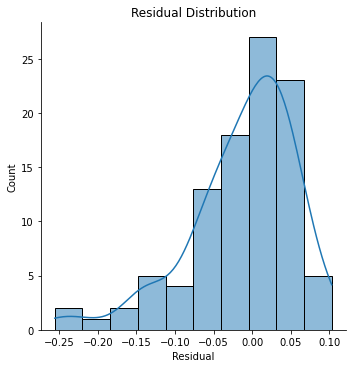

In [38]:
residual = y_test - linear_pred
sns.displot(x = residual, kde = True)
plt.xlabel("Residual");
plt.title("Residual Distribution");

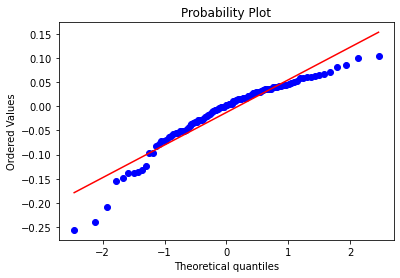

In [39]:
from scipy.stats import probplot
probplot(residual, dist="norm", plot=plt);